# Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Load data

In [3]:
df = pd.read_csv('glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0


In [4]:
# EDA and Data Visualization

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    float64
dtypes: float64(10)
memory usage: 78.2 KB


In [6]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
df.isnull().sum()

RI      785
Na      785
Mg      785
Al      785
Si      785
K       785
Ca      785
Ba      785
Fe      785
Type    785
dtype: int64

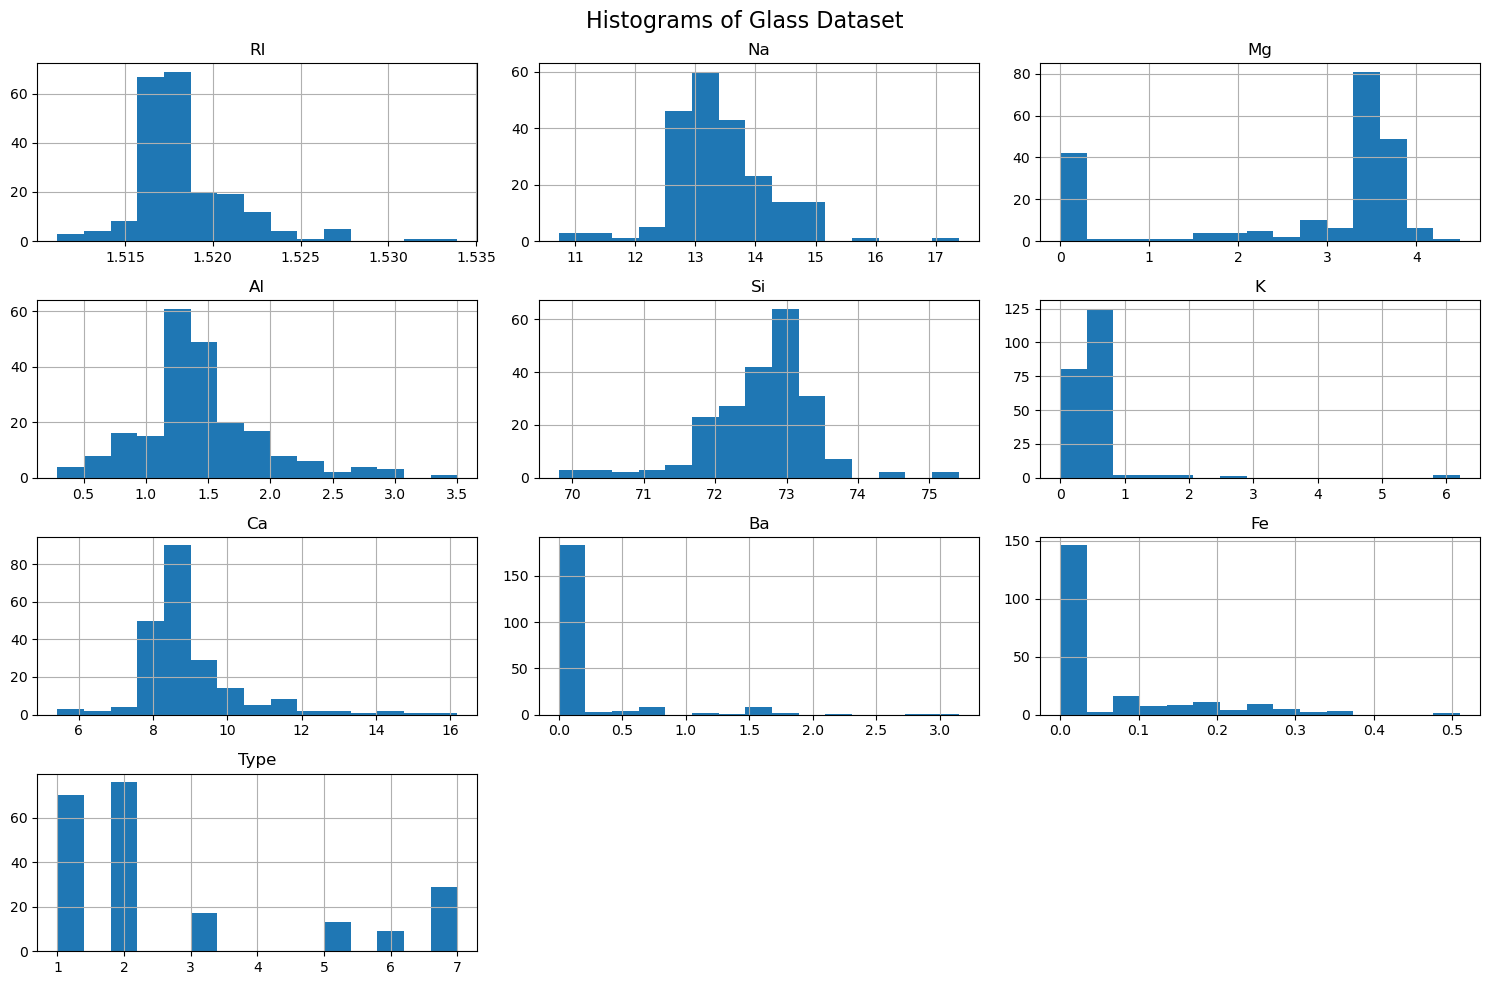

In [8]:
df.hist(bins=15, figsize=(15, 10))
plt.suptitle("Histograms of Glass Dataset", fontsize=16)
plt.tight_layout()
plt.show()

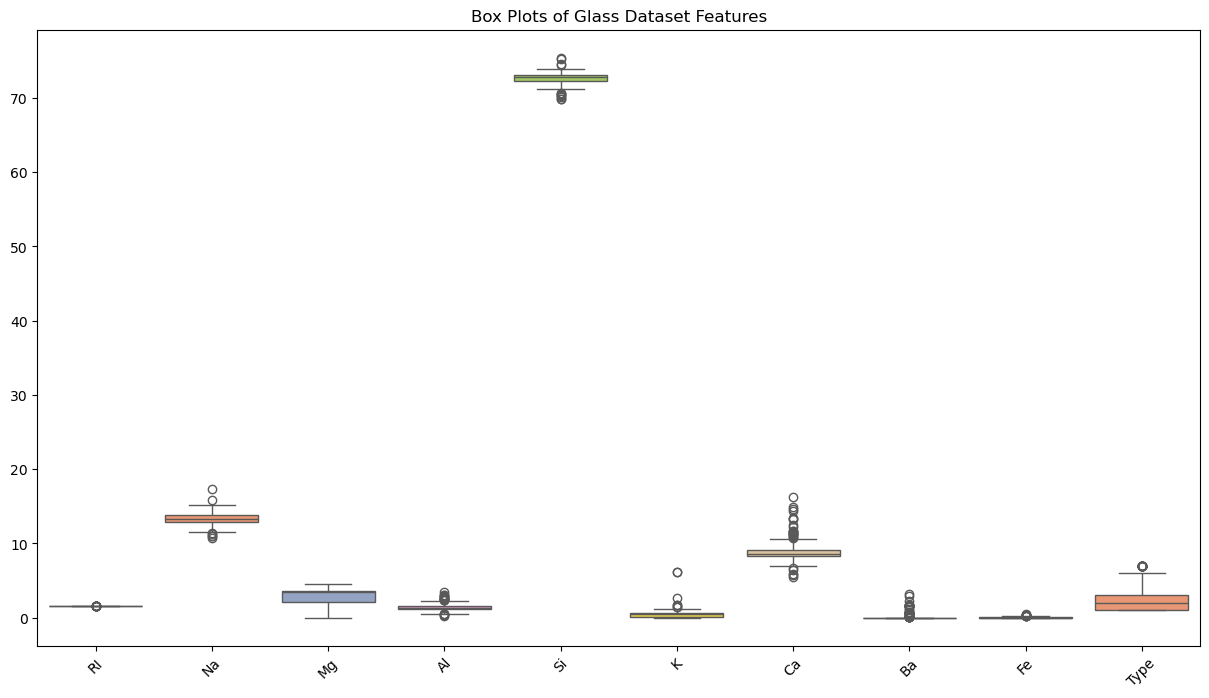

In [9]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, palette="Set2")
plt.title("Box Plots of Glass Dataset Features")
plt.xticks(rotation=45)
plt.show()


#Outliers Detection

K, Ba, Fe has Strong presence of outliers, especially with values much greater than the median.

Ca also shows some high-value outliers, though less extreme.

RI, Na, Si Distributions are tighter, indicating more stable measurement ranges.


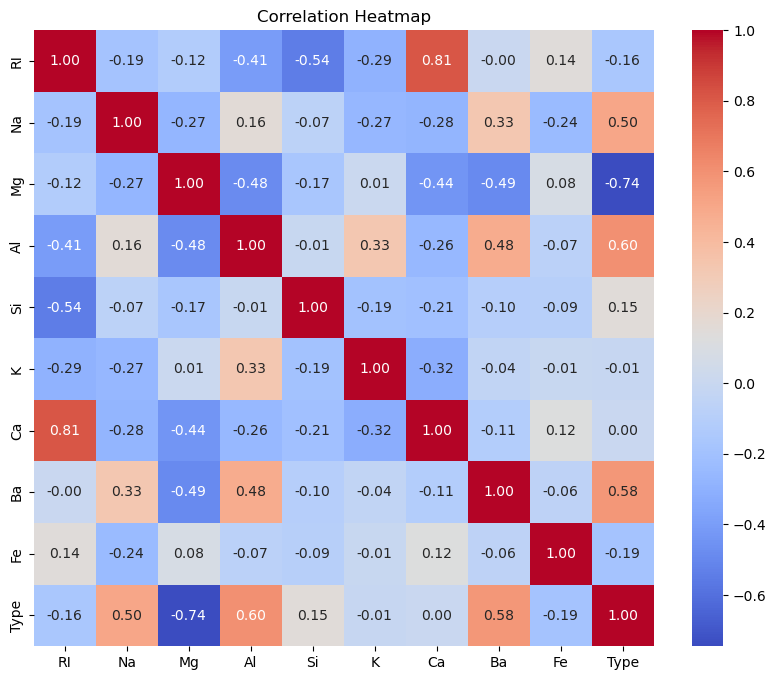

In [10]:
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


#Ca and K, Al and Na are having Strong positive correlations
Mg with Al, Si are having Negative correlation 


In [11]:
# Data Preprocessing

In [12]:
df.isnull().sum()

RI      785
Na      785
Mg      785
Al      785
Si      785
K       785
Ca      785
Ba      785
Fe      785
Type    785
dtype: int64

In [13]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [14]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [15]:
print(df.dtypes)

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type    float64
dtype: object


In [16]:
df['Type'] = df['Type'].astype(int)

In [17]:
# converted 'Type' to integer for model compatibility

In [18]:
print(df.dtypes)

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int32
dtype: object


In [19]:
X = df.drop('Type', axis=1)
y = df['Type']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)      

In [22]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

In [23]:
# Handel inbalanced data using SMOTE.

In [24]:
# Random Forest Model Implementation

In [25]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [26]:
rf.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(random_state=42)

In [27]:
y_pred = rf.predict(X_test_scaled)

In [28]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       0.69      0.64      0.67        14
           2       0.99      0.98      0.99       172
           3       0.25      0.33      0.29         3
           5       0.50      0.67      0.57         3
           6       1.00      1.00      1.00         2
           7       0.62      0.83      0.71         6

    accuracy                           0.94       200
   macro avg       0.68      0.74      0.70       200
weighted avg       0.94      0.94      0.94       200



In [29]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.935
Precision: 0.6768984220907298
Recall: 0.742155777039498
F1 Score: 0.703905413582833


In [30]:
# Bagging and Boosting Methods

In [31]:
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)

In [32]:
bagging_model.fit(X_train_balanced, y_train_balanced)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)

In [33]:
y_pred_bag = bagging_model.predict(X_test_scaled)

In [34]:
ada_model = AdaBoostClassifier(
    n_estimators=100,
    random_state=42
)

ada_model.fit(X_train_balanced, y_train_balanced)
y_pred_ada = ada_model.predict(X_test_scaled)

In [35]:
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

gb_model.fit(X_train_balanced, y_train_balanced)
y_pred_gb = gb_model.predict(X_test_scaled)

In [36]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n {name} Classification Report")
    print(classification_report(y_true, y_pred, zero_division=0))

evaluate_model("Bagging (Decision Tree)", y_test, y_pred_bag)
evaluate_model("AdaBoost", y_test, y_pred_ada)
evaluate_model("Gradient Boosting", y_test, y_pred_gb)


 Bagging (Decision Tree) Classification Report
              precision    recall  f1-score   support

           1       0.77      0.71      0.74        14
           2       0.99      0.98      0.99       172
           3       0.20      0.33      0.25         3
           5       0.50      0.67      0.57         3
           6       1.00      1.00      1.00         2
           7       0.83      0.83      0.83         6

    accuracy                           0.94       200
   macro avg       0.72      0.76      0.73       200
weighted avg       0.95      0.94      0.95       200


 AdaBoost Classification Report
              precision    recall  f1-score   support

           1       0.56      0.36      0.43        14
           2       0.97      0.97      0.97       172
           3       0.08      0.33      0.13         3
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         2
           7       0.57      0.67      0.62        


#Bagging (Decision Tree) gave the best overall performance, with high accuracy and strong F1-score.

Gradient Boosting was a close second, showing better handling of minority classes than AdaBoost.

AdaBoost struggled with small class sizes, making it less suitable for imbalanced multi-class datasets.


# Interview Questions

#1. Explain Bagging and Boosting methods. How is it different from each other.


#Bagging and Boosting are methods that combine multiple models to improve accuracy.
Bagging builds models independently on random data samples to reduce variance, like in Random Forest.
Boosting builds models one after another, each fixing the last model’s mistakes, to reduce bias, like in AdaBoost.
The key difference is Bagging trains in parallel, Boosting trains in sequence.


#2. Explain how to handle imbalance in the data.


#To handle imbalanced data, we can use techniques like
resampling (oversampling the minority class or undersampling the majority), 
SMOTE (synthetic data generation), or apply class weights to give more importance to the minority class. 
These methods help the model learn from all classes more fairly and improve performance on underrepresented classes.
